Name: Jay Goyal

Experiment: 5

Roll No: C017

Btech EXTC

Third Year

Semester 6

In [ ]:
#Optimizers used in deep Learning

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot  as plt
from numpy import where 


In [ ]:
X, y = make_blobs(n_samples = 1000, n_features=2, centers=3, cluster_std=2, random_state=2)  # features 2 means x1 and x2  y is for centres and deviation is between x1 and x2

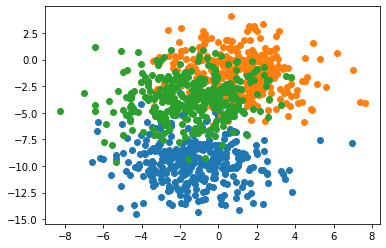

In [ ]:
#Scatter plot for the dataset
for i in range(3):
  row_ix = where(y==i)
  plt.scatter(X[row_ix,0],X[row_ix,1])

In [ ]:
X

array([[  0.48719811,  -0.43160548],
       [ -1.48958879,  -3.47915742],
       [ -2.06250444,  -7.73300419],
       ...,
       [ -4.4839941 ,  -3.17623663],
       [ -1.92705839,   2.94801349],
       [ -2.32988529, -10.66109273]])

In [ ]:
y

array([2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0,
       0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1,

In [ ]:
#we change 0 1 2 to one hot vector as we need to use softmax and the reason we using softmax is because it is a multi class problem.
from keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
#Split the dataset into train and test
n_train = 500
trainX,testX = X[:n_train,:],X[n_train:,:]
trainy,testy = y[:n_train,:],y[n_train:,:]

In [ ]:
trainX.shape

(500, 2)

In [ ]:
#define the model
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(50, input_dim = 2, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(3, activation = 'softmax'))

In [ ]:
#compiling the model
from keras.optimizers import SGD
opt = SGD(lr = 1E-2) #0.01
model.compile(loss= 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [ ]:
#fit the model
history = model.fit(trainX,trainy, validation_data = (testX,testy), epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 30ms/step - loss: 1.7798 - accuracy: 0.4731 - val_loss: 1.4711 - val_accuracy: 0.5580
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 1.1928 - accuracy: 0.5640 - val_loss: 0.8397 - val_accuracy: 0.6620
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8592 - accuracy: 0.6087 - val_loss: 0.7222 - val_accuracy: 0.6880
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8284 - accuracy: 0.6111 - val_loss: 1.3640 - val_accuracy: 0.5700
Epoch 5/200
16/16 [==============================] - 0s 3ms/step - loss: 0.9764 - accuracy: 0.5813 - val_loss: 0.6624 - val_accuracy: 0.7140
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 0.7617 - accuracy: 0.6523 - val_loss: 0.6546 - val_accuracy: 0.7100
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8263 - accuracy: 0.6221 - val_loss: 0.6834 - val_accuracy: 0.7200
Epoch 8/200


Text(0.5, 1.0, 'lr = 1E-2')

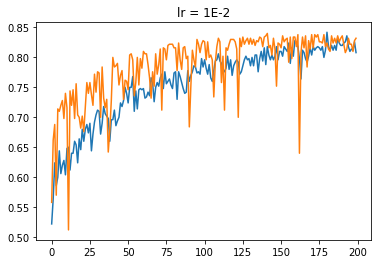

In [ ]:
#plot learning curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('lr = 1E-2')

In [ ]:
#Learning rate dynamics
#Defining functions for seeing the effect of different learning rates
#Prepare train and test dataset
def prepare_data():
  X,y=make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)
  #One hot encode the output variabe
  y=to_categorical(y)
  #Split the dataset into train and test
  n_train=500
  trainX,testX=X[:n_train,:],X[n_train:,:]
  trainy,testy=y[:n_train],y[n_train:]
  return trainX,trainy,testX,testy

In [ ]:
#Fit the model and plot learning curve
def fit_model(trainX,trainy,testX,testy,lrate):
  model=Sequential()
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(3,activation='softmax'))
  #Compile the model
  opt=SGD(lr=lrate)
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
  #Fit the model
  history=model.fit(trainX,trainy,validation_data=(testX,testy),epochs=200,verbose=0)     
  #Plot the learning curve
  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='test')
  plt.title('lrate='+str(lrate),pad=-50)

In [ ]:
trainX,trainy,testX,testy = prepare_data()
trainX.shape

(500, 2)

In [ ]:
trainy.shape

(500, 3)

In [ ]:
trainX,trainy,testX,testy=prepare_data()   

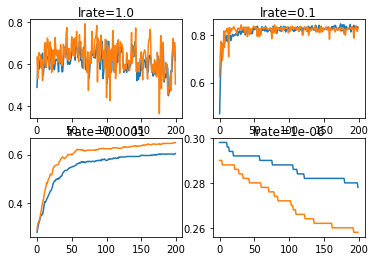

In [ ]:
trainX,trainy,testX,testy=prepare_data()      
learning_rate=[1E-0,1E-1,1E-4,1E-6]
for i in range(len(learning_rate)):
  #Define plot number
  plot_no=220+(i+1)
  plt.subplot(plot_no)
  fit_model(trainX,trainy,testX,testy,learning_rate[i])

In [ ]:
#momentum based optimizer
#fit a model and plot a learning curve
def fit_model(trainX,trainy,testX,testy,momentum):
  model=Sequential()
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(3,activation='softmax'))
  #Compile the model
  opt=SGD(lr= 0.01,momentum = momentum)
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
  #Fit the model
  history=model.fit(trainX,trainy,validation_data=(testX,testy),epochs=200,verbose=0)     
  #Plot the learning curve
  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='test')
  plt.title('momentum='+str(momentum),pad=-80)


In [ ]:
momentums = [0.0,0.5,0.9,0.99]

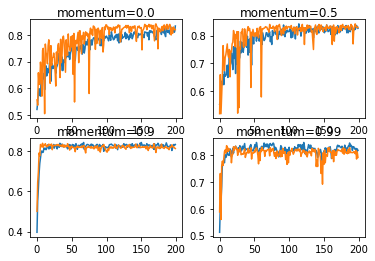

In [ ]:
for i in range(len(momentums)):
  #Define plot number
  plot_no=220+(i+1)
  plt.subplot(plot_no)
  fit_model(trainX,trainy,testX,testy,momentums[i])

In [ ]:
#Adagrad
#Rms prop
#adam
#fit a model and plot a learning curve
def fit_model(trainX,trainy,testX,testy,optimizer):
  model=Sequential()
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(3,activation='softmax'))
  #Compile the model
  model.compile(loss='categorical_crossentropy',optimizer = optimizer, metrics=['accuracy'])
  #Fit the model
  history=model.fit(trainX,trainy,validation_data = (testX,testy),epochs=200,verbose=0)     
  #Plot the learning curve
  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='test')
  plt.title('opt='+str(optimizer),pad=-80)

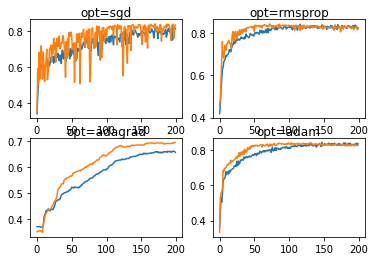

In [ ]:
#create learning curves
optim = ['sgd','rmsprop','adagrad','adam']
for i in range(len(optim)):
  #Define plot number
  plot_no=220+(i+1)
  plt.subplot(plot_no)
  fit_model(trainX,trainy,testX,testy,optim[i])
